## Time Series Analysis in Python | Time Series Forecasting | Data Science with Python | Edureka  

https://www.youtube.com/watch?v=e8Yw4alG16Q&list=PL9ooVrP1hQOHUfd-g8GUpKI3hHOwM_9Dn&index=24

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
dataset = pd.read_csv('data/AirPassengers.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
# Parse 'Month' object to datetime type()
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
indexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


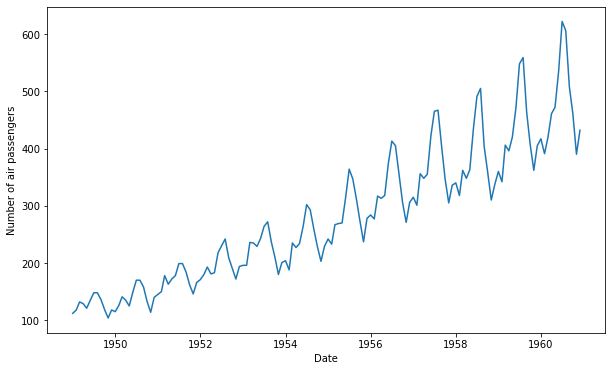

In [7]:
# Plot graph
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset);

In [8]:
# Determining rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


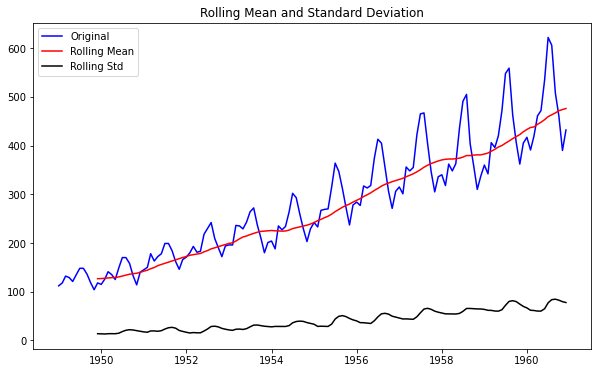

In [9]:
# Plot rolling statistics
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

# Trending Rolling Mean and Rolling Std further indicate beyond the trending original data that
# this time series data is not stationary

In [10]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-value should be around 0.5 for stationary data. Critical value should be more than the Test Statistic. Null Hypothesis states that p-val should always be less. Therefore we not reject the Null Hypothesis and we can say that data is not stationary.

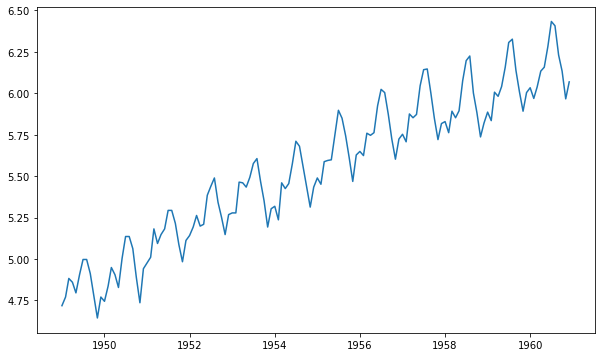

In [11]:
# Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale);

# Trend remains even though val of y has changed...I think this indicates non-stationarity?

A logarithmic, or log, scale gives equal visual weight to equal relative changes: a 10% move looks the same whether it is from a high or a low base.  

The result is that the magnitudes of earlier and later booms and busts can be compared on a level playing field. Further, with log scales, series experiencing exponential growth appear as straight lines, making charts easier to interpret.  

With a logarithmic scale a constant percentage change is seen as a constant vertical distance so a constant growth rate is seen as a straight line.  

A logarithmic scale (or log scale) is a way of displaying numerical data over a very wide range of values in a compact way—typically the largest numbers in the data are hundreds or even thousands of times larger than the smallest numbers. Such a scale is nonlinear: the numbers 10 and 20, and 60 and 70, are not the same distance apart on a log scale. Rather, the numbers 10 and 100, and 60 and 600 are equally spaced. Thus moving a unit of distance along the scale means the number has been multiplied by 10 (or some other fixed factor). Often exponential growth curves are displayed on a log scale, otherwise they would increase too quickly to fit within a small graph. Another way to think about it is that the number of digits of the data grows at a constant rate. For example, the numbers 10, 100, 1000, and 10000 are equally spaced on a log scale, because their numbers of digits is going up by 1 each time: 2, 3, 4, and 5 digits. In this way, adding two digits multiplies the quantity measured on the log scale by a factor of 100. 

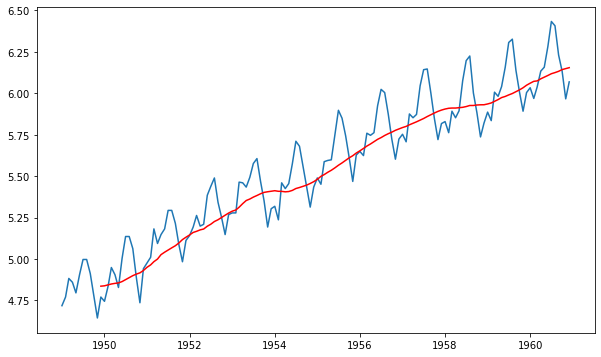

In [12]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red');
#plt.plot(movingSTD, color='green');

# Mean is not stationary, upward trend with respect to time

In [13]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head()

#Remove Nan values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [14]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    # Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    orig = plt.plot(timeseries, color='black', label='Original')
    mean = plt.plot(movingAverage, color='green', label='Rolling Mean')
    std = plt.plot(movingSTD, color='blue', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller Test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0: 4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print(dfoutput)

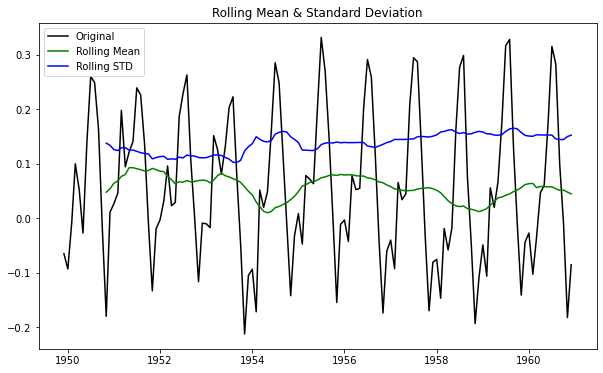

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [15]:
test_stationarity(datasetLogScaleMinusMovingAverage)

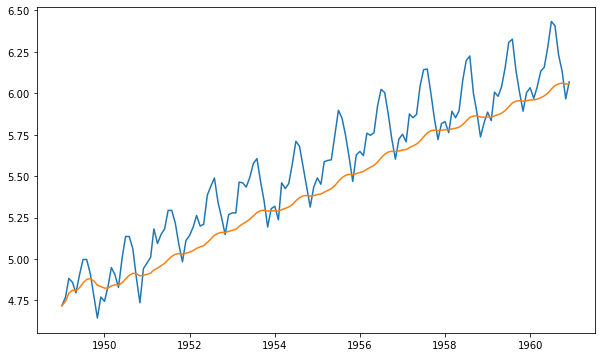

In [16]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage);

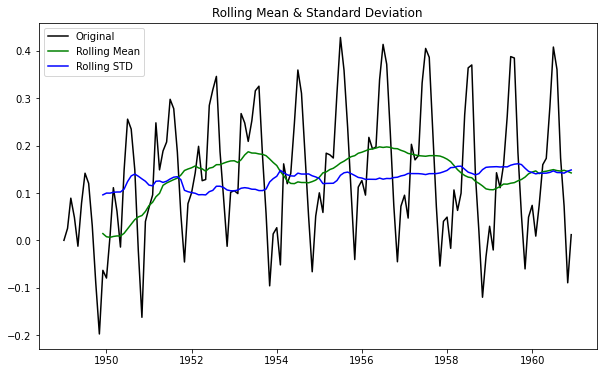

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [17]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

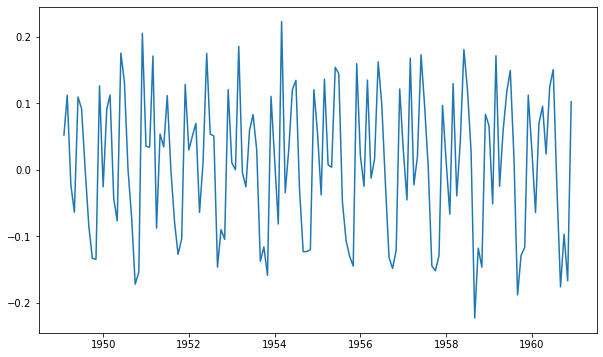

In [18]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting);

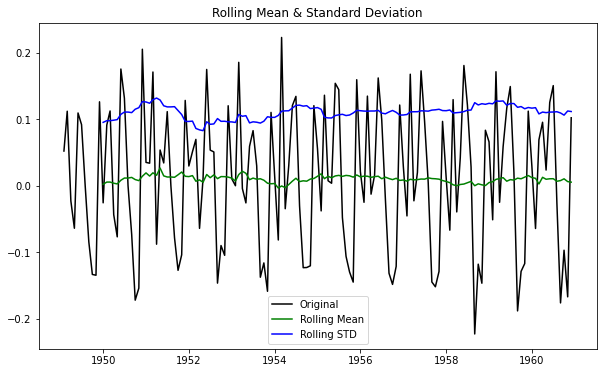

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [19]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

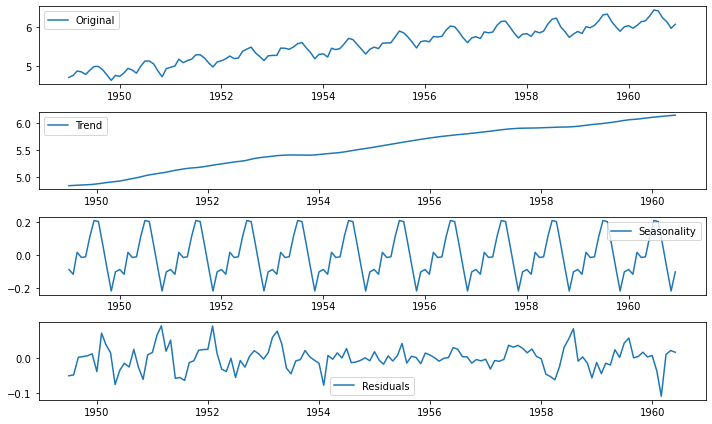

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

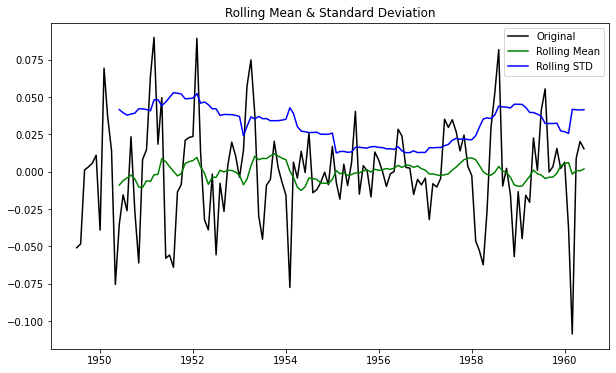

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [21]:
decomposedLogData = pd.DataFrame({'#Passengers':residual})
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

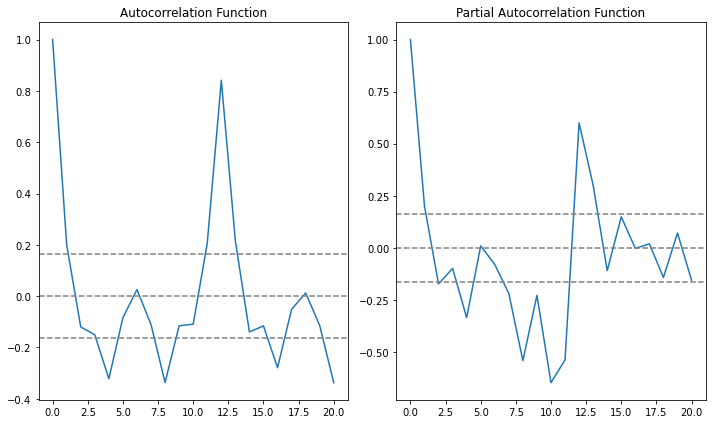

In [27]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20, fft=False)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

Plotting AR model


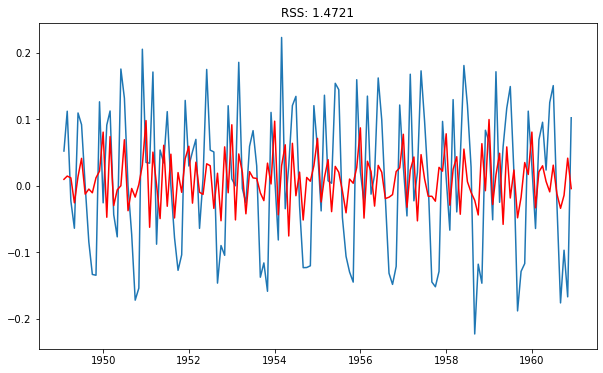

In [41]:
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')#, 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
#warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA', FutureWarning)

# AR Model
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))
results_AR = model.fit(disp=-1)

plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
print('Plotting AR model')

# The greater the RSS the worse it is for me...

Plotting MA model


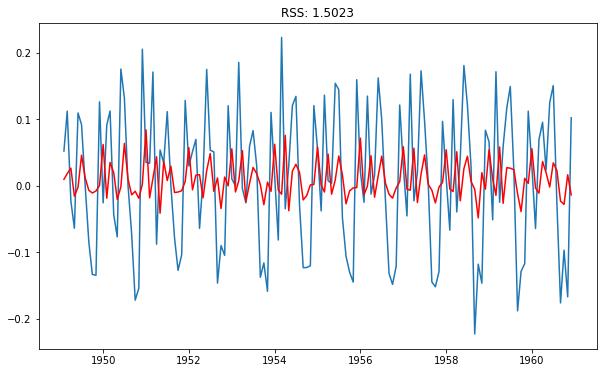

In [40]:
#MA Model
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))
results_MA = model.fit(disp=-1)

import warnings
warnings.filterwarnings('ignore')

plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
print('Plotting MA model')

Plotting ARIMA model


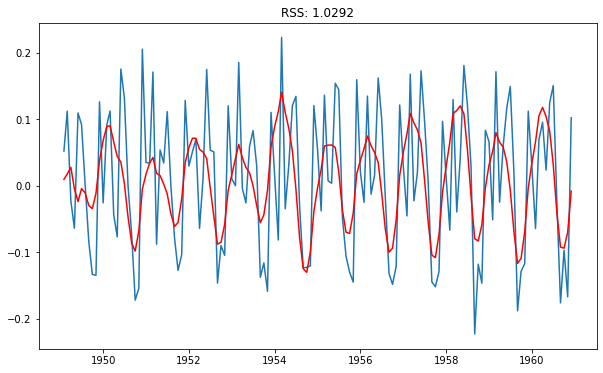

In [44]:
#ARIMA Model
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)

import warnings
warnings.filterwarnings('ignore')

plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
print('Plotting ARIMA model')

In [45]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [46]:
# Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [49]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

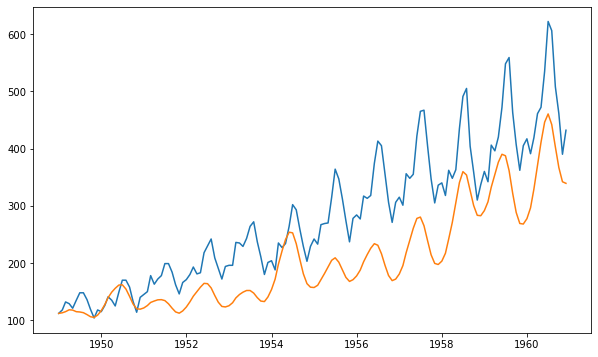

In [51]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA);

In [53]:
indexedDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


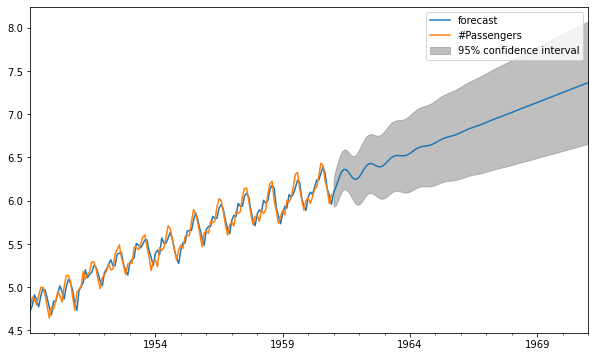

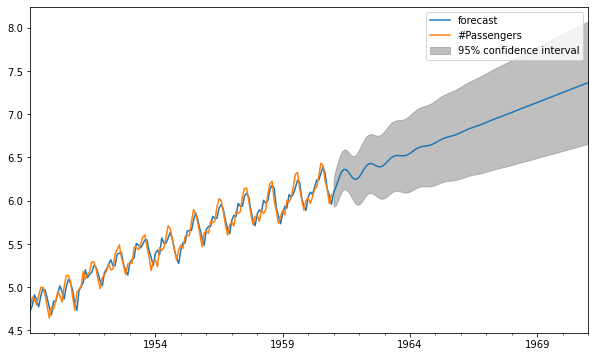

In [55]:
results_ARIMA.plot_predict(1, 264)
#x = results_ARIMA.forecast(steps=120) # prediction for the next 10 years * 12 = 120 steps

In [57]:
results_ARIMA.forecast(steps=120)

(array([6.09553393, 6.15281404, 6.22442965, 6.29241099, 6.34164712,
        6.36359357, 6.35784681, 6.331393  , 6.29597538, 6.26447713,
        6.24738326, 6.25025172, 6.27275836, 6.30940311, 6.3515149 ,
        6.38988651, 6.41727376, 6.43011048, 6.42906684, 6.41842485,
        6.40456152, 6.39403614, 6.39183082, 6.40019502, 6.41833691,
        6.44295405, 6.46937432, 6.49293982, 6.51024114, 6.51989029,
        6.52267574, 6.52112383, 6.51864524, 6.51853687, 6.52311921,
        6.53322358, 6.54812867, 6.56591555, 6.58410305, 6.60036536,
        6.61313262, 6.62192776, 6.62737784, 6.63093125, 6.63438685,
        6.63937982, 6.64696502, 6.65739838, 6.67015322, 6.68414248,
        6.69806623, 6.71077897, 6.72157728, 6.73033979, 6.73749806,
        6.74386374, 6.75037319, 6.75782589, 6.76668679, 6.7769982 ,
        6.78841316, 6.80032851, 6.81207191, 6.82308756, 6.83307132,
        6.84202488, 6.85022308, 6.85811217, 6.86617336, 6.87479148,
        6.88416299, 6.89426381, 6.90487886, 6.91

In [ ]:
x[1]

In [ ]:
len(x[1])

In [ ]:
np.exp(x[1])